In [ ]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/instagram.csv')
df = df.head(50000)
df.head()

,review_description,rating,review_date
0,"The app is good for connecting with friends, f...",3,2023-07-11 23:57:07
1,"Used to be my favorite social media app, but ""...",2,2023-07-22 21:37:09
2,Instagram is the best of all the social media....,5,2023-07-25 03:24:58
3,"I love this app.. but as of late, I have been ...",2,2023-07-09 04:49:57
4,Used to be a great app but there are so many m...,3,2023-07-17 16:47:04


Shape of dataset

In [ ]:
rows, cols = df.shape
print(f"There are {rows} and {cols} columns in dataset")

There are 50000 and 3 columns in dataset


Identify and Remove Duplicate data

In [ ]:
print(f"There are {df.duplicated().sum()} duplicate values")
df = df.drop_duplicates()

There are 0 duplicate values


In [ ]:
df['review_description'][0]

"The app is good for connecting with friends, family and even potential business partners. However as of recently I've experienced some problems with the messages portion of the app (ex: themes aren't showing up on my end but are present on other person's end). Idk if it has to do with a bug but it happened all of sudden out of nowhere on both of my pages (one private the other public). But besides the occasional bugs and sometimes the app/website being down randomly, I say it's a decent app."

Data Cleaning

In [ ]:
for i in range(len(df['review_description'])):
     df['review_description'][i]= re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "",df['review_description'][i])

Data description

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rating,50000.0,2.23468,1.474845,1.0,1.0,2.0,3.0,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_description  50000 non-null  object
 1   rating              50000 non-null  int64 
 2   review_date         50000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.5+ MB


Identify Null Values

In [ ]:
df.isna().sum()

review_description    0
rating                0
review_date           0
dtype: int64

Function to classify Sentiment Score

In [ ]:
def analyze(x):
        if(x>=0.5):
            return "Positive"
        elif x<=-0.5:
            return "Negative"
        else:
            return "Neutral"

Function to calculate sentiment score using TextBlob

In [ ]:
def score(x):
        blob = TextBlob(x)
        return blob.sentiment.polarity

In [ ]:
df['score']=df['review_description'].apply(score)
df['analysis']=df['score'].apply(analyze)

In [ ]:
df.head()

,review_description,rating,review_date,score,analysis
0,The app is good for connecting with friends fa...,3,2023-07-11 23:57:07,0.054365,Neutral
1,Used to be my favorite social media app but im...,2,2023-07-22 21:37:09,-0.138148,Neutral
2,Instagram is the best of all the social media ...,5,2023-07-25 03:24:58,0.310648,Neutral
3,I love this app but as of late I have been hav...,2,2023-07-09 04:49:57,0.087500,Neutral
4,Used to be a great app but there are so many m...,3,2023-07-17 16:47:04,0.109686,Neutral


In [ ]:
df['analysis'].unique()

array(['Neutral', 'Negative', 'Positive'], dtype=object)

In [ ]:
df["rating"].value_counts()

1    24569
2     7532
5     6915
3     6410
4     4574
Name: rating, dtype: int64

<BarContainer object of 50000 artists>

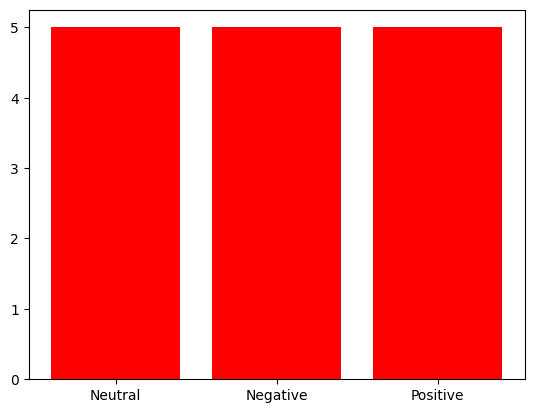

In [ ]:
# Plotting a barplot to check relation between analysis and rating.
plt.bar(df['analysis'],df['rating'],color ='r')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,50000.0,2.234680,1.474845,1.0,1.00000,2.000,3.000000,5.0
score,50000.0,0.068158,0.290136,-1.0,-0.07381,0.025,0.215852,1.0


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
review_description,50000,49971,Not working properly,7
review_date,50000,49883,2023-07-11 15:07:07,2
analysis,50000,3,Neutral,43753


Define a rating function to classify rating.

In [ ]:
def rating(x):
    if x>=8 and x<=10:
        return 'Positive'
    elif x>=4 and x<=7:
         return 'Neutral'
    else:
         return 'Negative'

In [ ]:
df['rating_analysis']=df['rating'].apply(rating)

In [ ]:
df['final_rating'] = 'Positive'

In [ ]:
for i in range(len(df)):
    if (df['analysis'][i]=='Positive' and df['rating_analysis'][i] == 'Positive'):
        df['final_rating'][i] = 'Positive'

    elif (df['analysis'][i] == 'Positive' and df['rating_analysis'][i] == 'Neutral')or (df['analysis'][i] == 'Neutral' and df['rating_analysis'][i] == 'Positive'):
        df['final_rating'][i] = 'Positive'

    elif (df['analysis'][i] == 'Negative' and df['rating_analysis'][i] == 'Neutral')or (df['analysis'][i] == 'Neutral' and df['rating_analysis'][i] == 'Negative'):
        df['final_rating'][i] = 'Neutral'

    elif (df['analysis'][i] == 'Neutral' and df['rating_analysis'][i] == 'Neutral'):
        df['final_rating'][i] = 'Neutral'

    elif (df['analysis'][i] == 'Negative' and df['rating_analysis'][i] == 'Negative'):
        df['final_rating'][i] = 'Negative'

    else:
        df['final_rating'][i] = 'Neutral'

In [ ]:
df.head()

,review_description,rating,review_date,score,analysis,rating_analysis,final_rating
0,The app is good for connecting with friends fa...,3,2023-07-11 23:57:07,0.054365,Neutral,Negative,Neutral
1,Used to be my favorite social media app but im...,2,2023-07-22 21:37:09,-0.138148,Neutral,Negative,Neutral
2,Instagram is the best of all the social media ...,5,2023-07-25 03:24:58,0.310648,Neutral,Neutral,Neutral
3,I love this app but as of late I have been hav...,2,2023-07-09 04:49:57,0.087500,Neutral,Negative,Neutral
4,Used to be a great app but there are so many m...,3,2023-07-17 16:47:04,0.109686,Neutral,Negative,Neutral


In [ ]:
df.tail()

,review_description,rating,review_date,score,analysis,rating_analysis,final_rating
49995,App is getting crash every time I watch insta ...,1,2023-06-22 07:04:01,0.000000,Neutral,Negative,Neutral
49996,The lastest update wont let me see ANY picture...,1,2019-10-25 03:05:16,0.377778,Neutral,Negative,Neutral
49997,Really like instagram But recently the app has...,1,2019-11-14 05:39:21,0.040000,Neutral,Negative,Neutral
49998,I dont know why but a few days ago it just com...,3,2022-06-29 18:06:12,-0.088889,Neutral,Negative,Neutral
49999,App has been shutting me out of one of my acco...,1,2022-08-13 19:06:43,-0.037727,Neutral,Negative,Neutral


In [ ]:
df['final_rating'].unique()

array(['Neutral', 'Negative', 'Positive'], dtype=object)

<Axes: xlabel='final_rating', ylabel='count'>

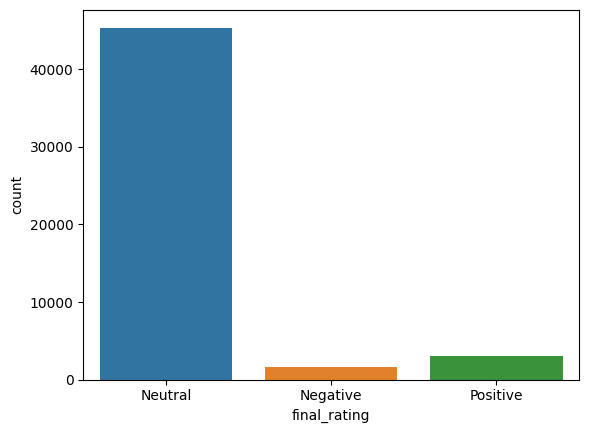

In [ ]:
sns.countplot(x='final_rating',data =df)

***According to analysis, as per public reviews, their response on this app is neutral.***